# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 'ScheduledDay' tells us on what day the patient set up their appointment. 'Neighbourhood' indicates the location of the hospital.

QUESTIONS:
1. How does the distribution of the female patients differ from that of the male patients?
2. What is the bio of the youngest patient?
3. What is the bio of the oldest patient?
4. Which gender is more likely to show-up on the scheduled appointment date?
5. How doe the neighbourhood of the patient determine whether the patient will show-up on the appointment day or not?
6. How does the age of the patient determine whether the patient will show-up on the day of appointment or not?
7. Which is the most frequent disease?
8. What is the most common age group of the patients?
9. What is the most common age group of the Hipertension patients?
10. What is the most common age group of the Diabetes patients?
11. What is the most common age group of the Alcoholism patients?
12. What is the most common age group of the Handicap patients?
13. Tally the overall appointment show-up to no show-up rate.


In [2]:
#import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Loading the data and printing out a few lines

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(7)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


In [4]:
#gets the information about the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


### Data Cleaning

In [5]:
#Checking for missing values
print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


No missing values found.

In [6]:
#Checking for duplicate rows
print(df.duplicated().sum())

0


No duplicate rows found.

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#Checking for non-positive PatientID
print(df[df.PatientId<=0]['PatientId'])

Series([], Name: PatientId, dtype: float64)


No non-positive Patient ID found.

In [9]:
#Checking for non-positive AppointmentID
print(df[df.AppointmentID<=0]['AppointmentID'])

Series([], Name: AppointmentID, dtype: int64)


No non-positive AppointmentID found.

In [10]:
#Checking for invalid characters under the Gender column
print(df['Gender'].unique())

['F' 'M']


No invalid characters found under the Gender column.

In [11]:
#Checking for invalid data under the ScheduledDay column
print(df['ScheduledDay'].unique())

['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...,
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']


No invalid data found under the ScheduledDay column.

In [12]:
#Checking for invalid data under the AppointmentDay column
print(df['AppointmentDay'].unique())

['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']


No invalid data found under the AppointmentDay column.

In [13]:
#Checking for invalid ages
print(df['Age'].unique())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


Found an invalid age - Negative age found.

In [14]:
#Exclude the data with negative age
df = df[df.Age!=-1]

print(df['Age'].unique())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99]


In [15]:
#Checking for invalid Neighourhood data
print(df['Neighbourhood'].unique())

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO' 'DO MOSCOSO'
 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA' 'ILHA DO FRADE'
 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO' 'BOA VISTA'
 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA' 'BARRO VERMELHO'
 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE' 'ENSEADA DO SUÁ'
 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH' 'SANTA TEREZA' 'CRUZAMENTO'
 'ILHA DO PRÍNCIPE' 'ROMÃO' 'COMDUSA' 

No invalid Neighbourhood data found.

In [16]:
#Checking for invalid Scholarship data
print(df['Scholarship'].unique())

[0 1]


No invalid Scholarship data found.

In [17]:
#Checking for invalid Hipertension data
print(df['Hipertension'].unique())

[1 0]


No invalid Hipertension data found.

In [18]:
#Checking for invalid Diabetes data
print(df['Diabetes'].unique())

[0 1]


No invalid Diabetes data found.

In [19]:
#Checking for invalid Alcoholism data
print(df['Alcoholism'].unique())

[0 1]


No invalid Alcoholism data found.

In [20]:
#Checking for invalid Handcap data
print(df['Handcap'].unique())

[0 1 2 3 4]


No invalid Handcap data found.

In [21]:
#Checking for invalid SMS_received data
print(df['SMS_received'].unique())

[0 1]


No invalid SMS_received data found.

In [22]:
#Checking for invalid No-show data
print(df['No-show'].unique())

['No' 'Yes']


No invalid No-show data found.

In [23]:
#rename the No-show column
df.rename(index = str, columns = {"No-show":"No_show"}, inplace=True)

In [24]:
#Converting the columns ScheduledDay and AppointmentDay to DateTime format.
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date


df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How does the distribution of the female patients differ from that of the male patients?

Text(0.5,1,'NO. OF FEMALE PATIENTS V/S MALE PATIENTS')

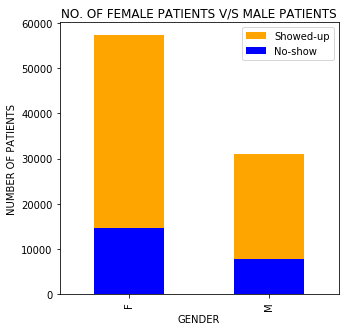

In [25]:
df.Gender[df.No_show=='No'].value_counts().plot(kind = 'bar', figsize = (5,5), label = 'Showed-up', color = 'orange')
df.Gender[df.No_show=='Yes'].value_counts().plot(kind = 'bar', figsize = (5,5), label = 'No-show', color = 'blue')
plt.legend()
plt.xlabel("GENDER")
plt.ylabel("NUMBER OF PATIENTS")
plt.title("NO. OF FEMALE PATIENTS V/S MALE PATIENTS")

The plot above shows the distribution of the Female patients in comparison to that of the Male patients. It clearly shows that there were more female patients.

### Research Question 2: What is the bio of the youngest patient?

In [26]:
df.loc[df['Age'].idxmin()]

PatientId         7.18443e+13
AppointmentID         5638545
Gender                      F
ScheduledDay       2016-04-29
AppointmentDay     2016-04-29
Age                         0
Neighbourhood       CONQUISTA
Scholarship                 0
Hipertension                0
Diabetes                    0
Alcoholism                  0
Handcap                     0
SMS_received                0
No_show                    No
Name: 59, dtype: object

The Youngest Patient is a girl of 0 years age. She does not suffer from any major disease mentioned in the list.

### Research Question 3: What is the bio of the oldest patient?

In [27]:
df.loc[df['Age'].idxmax()]

PatientId         3.19632e+13
AppointmentID         5700278
Gender                      F
ScheduledDay       2016-05-16
AppointmentDay     2016-05-19
Age                       115
Neighbourhood      ANDORINHAS
Scholarship                 0
Hipertension                0
Diabetes                    0
Alcoholism                  0
Handcap                     1
SMS_received                0
No_show                   Yes
Name: 63912, dtype: object

The Oldest Patient is a woman of 115 years of age. Except for being handicapped, she does not suffer from any other disease mentioned in the list.

### Research Question 4: Which gender is more likely to show-up on the scheduled appointment date?

Text(0.5,1,'NO-SHOW STATUS OF MALE AND FEMALE PATIENTS')

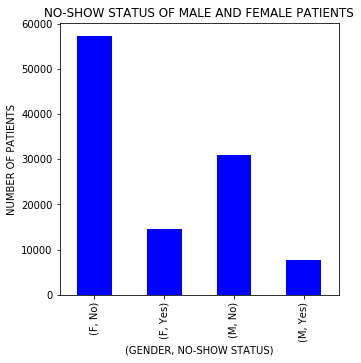

In [28]:
df.groupby('Gender').No_show.value_counts().plot(kind = 'bar', figsize = (5,5), color = 'blue')
plt.xlabel('(GENDER, NO-SHOW STATUS)')
plt.ylabel("NUMBER OF PATIENTS")
plt.title("NO-SHOW STATUS OF MALE AND FEMALE PATIENTS")

We can infer from the plot that female patients have a slightly more tendency of No-show than male patients.

### Research Question 5: How does the neighbourhood of the patient determine whether the patient will show-up on the day of appointment or not?

Text(0.5,1,'NO. OF PATIENTS SHOWED-UP V/S NEIGHBOURHOOD')

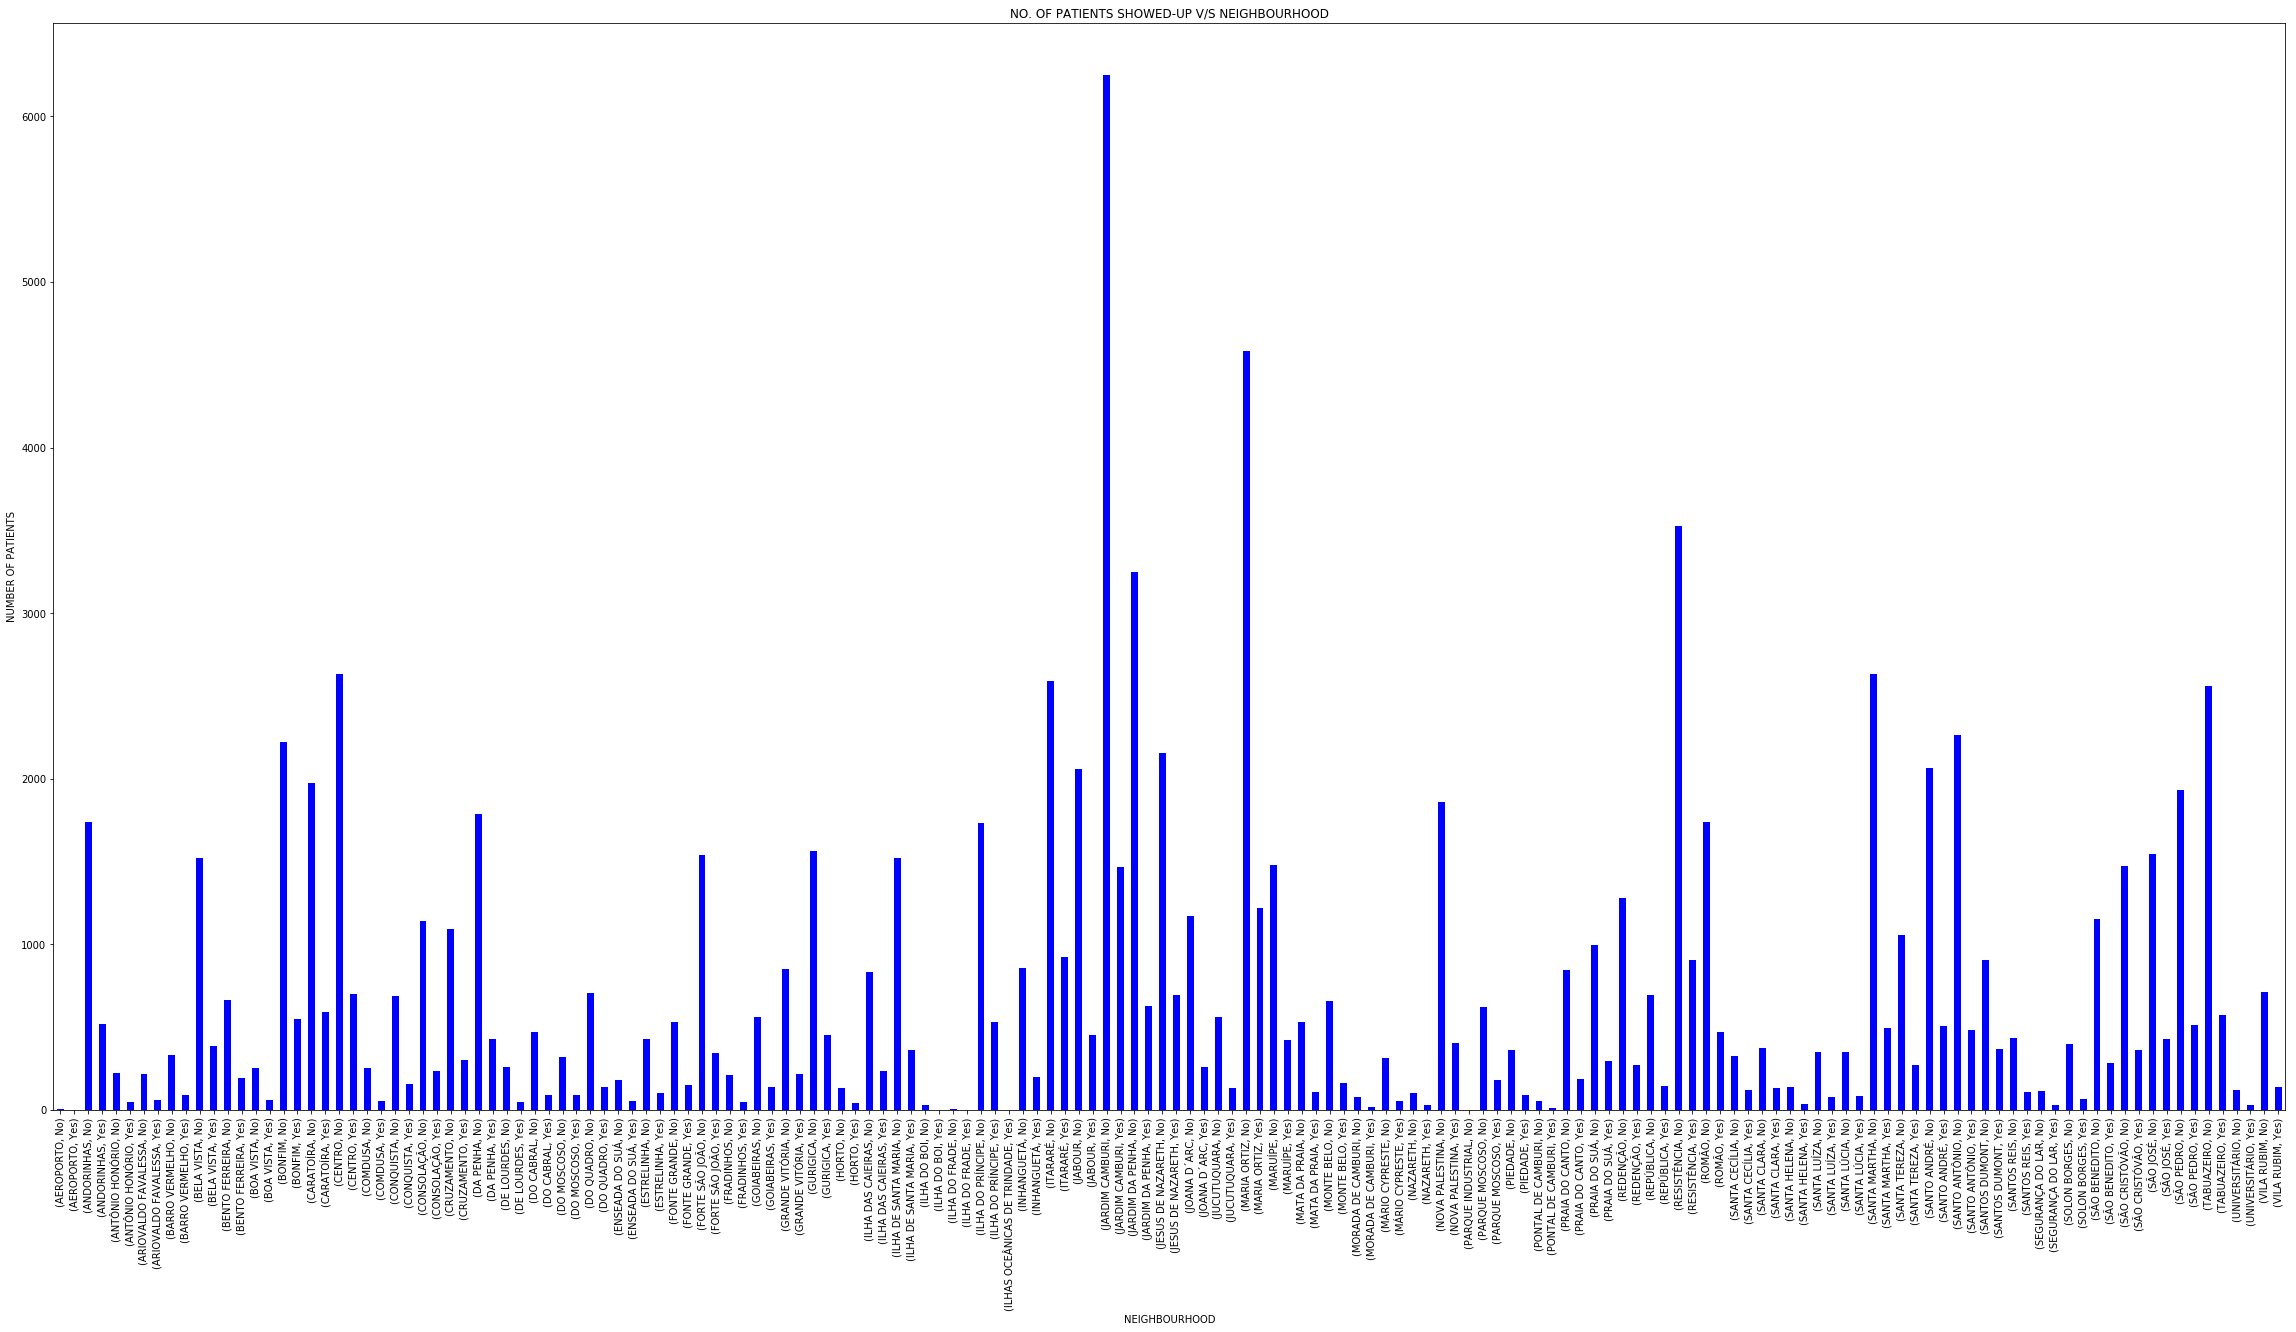

In [29]:
df.groupby('Neighbourhood').No_show.value_counts().plot(kind = 'bar', figsize = (40,20), color = 'blue')
plt.xlabel('NEIGHBOURHOOD')
plt.ylabel("NUMBER OF PATIENTS")
plt.title("NO. OF PATIENTS SHOWED-UP V/S NEIGHBOURHOOD")

Seeing the plot, we know that the neighbourhood of the patient plays a dominant role in the show-up of the patient.

### Research Question 6: How does the age of the patient determine whether that patient will show-up on the day of appointment or not?

Text(0.5,1,'NO. OF PATIENTS V/S AGE')

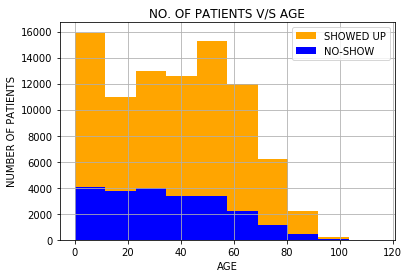

In [30]:
df.Age[df.No_show=='No'].hist(label = 'SHOWED UP', color = 'orange')
df.Age[df.No_show=='Yes'].hist(label = 'NO-SHOW', color = 'blue')
plt.legend()
plt.xlabel('AGE')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('NO. OF PATIENTS V/S AGE')

### Research Question 7: Which is the most frequent disease?

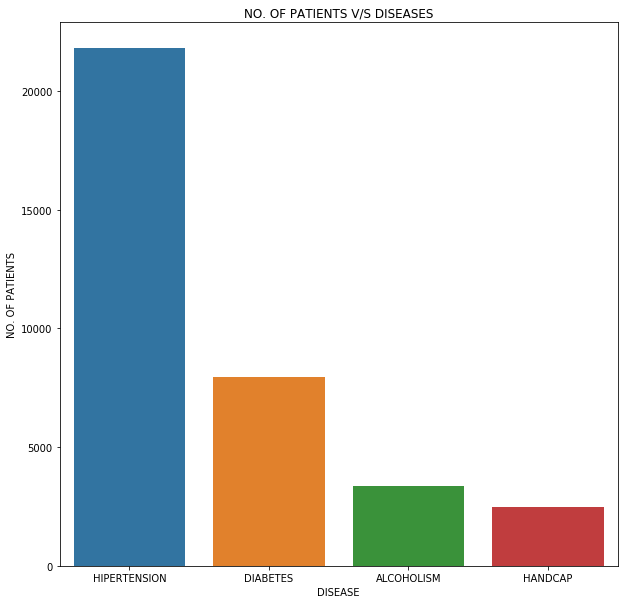

In [31]:
hipertension = df['Hipertension'].sum()
diabetes = df['Diabetes'].sum()
alcoholism = df['Alcoholism'].sum()
handicap = df['Handcap'].sum()
xlabel = ['HIPERTENSION', 'DIABETES', 'ALCOHOLISM', 'HANDCAP']
ylabel = [hipertension, diabetes, alcoholism, handicap]
plt.subplots(figsize = (10, 10))
plt.title('NO. OF PATIENTS V/S DISEASES')
plt.xlabel('DISEASE')
plt.ylabel('NO. OF PATIENTS')
plt.legend()
sns.barplot(xlabel, ylabel)

It is clear that people suffer from Hipertension the most.

### Research Question 8: What is the most common age group of the patients?

Text(0.5,1,'NO. OF PATIENTS V/S AGE')

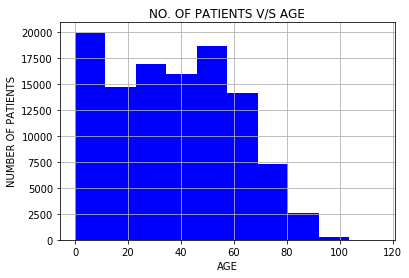

In [32]:
df.Age.hist(color = 'blue')
plt.legend()
plt.xlabel('AGE')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('NO. OF PATIENTS V/S AGE')

0 - 20 is the most common age group.

### Research Question 9: What is the most common age group of the Hipertension patients?

Text(0.5,1,'NO. OF PATIENTS V/S AGE FOR HIPERTENSION')

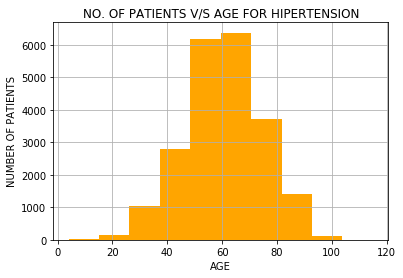

In [33]:
df.Age[df.Hipertension==1].hist(color = 'orange')
plt.legend()
plt.xlabel('AGE')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('NO. OF PATIENTS V/S AGE FOR HIPERTENSION')

60 - 70 is the most common age for Hipertension patients.

### Research Question 10: What is the most common age group of Diabetes patients?

Text(0.5,1,'NO. OF PATIENTS V/S AGE FOR DIABETES')

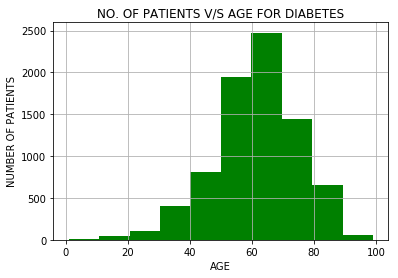

In [34]:
df.Age[df.Diabetes==1].hist(color = 'green')
plt.legend()
plt.xlabel('AGE')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('NO. OF PATIENTS V/S AGE FOR DIABETES')

60 - 70 is the most common age group for Diabetes patients.

### Research Question 11: What is the most common age group of Alcoholism patients?

Text(0.5,1,'NO. OF PATIENTS V/S AGE FOR ALCOHOLISM')

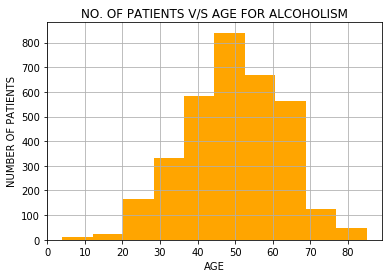

In [35]:
df.Age[df.Alcoholism==1].hist(color = 'orange')
plt.legend()
plt.xlabel('AGE')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('NO. OF PATIENTS V/S AGE FOR ALCOHOLISM')

The most common age group for alcoholism patients lies between 45 and 55 years of age.

### Research Question 12: What is the common age group of Handicap patients?

Text(0,0.5,'NO. OF PATIENTS')

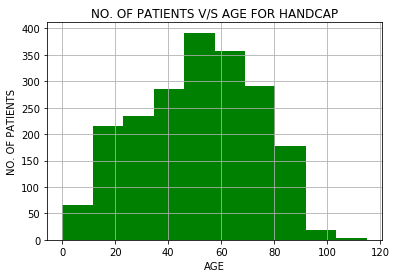

In [36]:
df.Age[df.Handcap==1].hist(color = 'GREEN')
plt.title('NO. OF PATIENTS V/S AGE FOR HANDCAP')
plt.xlabel("AGE")
plt.ylabel("NO. OF PATIENTS")

The most common age group for handicapped patients lies between 50 and 60 years of age.

### Research Question 13: Tally the overall appointment show-up to no show-up rate.

No     79.81
Yes    20.19
Name: No_show, dtype: float64

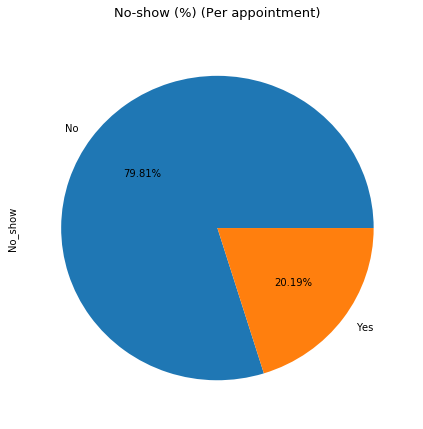

In [30]:
df_pie_chart = df['No_show'].value_counts()
ax = df_pie_chart.plot.pie(figsize=(7,7), autopct='%1.2f%%', fontsize=10);
ax.set_title('No-show' + ' (%) (Per appointment)\n', fontsize = 13);
np.round(df_pie_chart/df.shape[0]*100,2)

The overall Show-up rate is 79.81%

<a id='conclusions'></a>
## Conclusions

This project focused on the question whether or not the patients show-up on their appointment date. We get to see that the Gender of the patient plays a role in understanding whether or not that patient will show-up.
On completing our research, we get to know that:
1. There are more female patients than male patients.
2. Female patients have a slightly more tendency of not showing up on the day of appointment.
3. The overall show-up rate is 79.81%
4. 0 - 20 is the most common age group of the registeterd patients although they are not very prone to diseases.

But, it is discovered the Neighbourhood of the patient has a much stronger effect than the Gender for the patient missing a scheduled appointment.

LIMITATION:
The dataset contains data for only a specific time period. Had the data given been for some more years, then we could have got better results in terms of accuracy of the predictions. For example, getting more data would bring us to a stronger inference whether female or male patients fail to show-up more on the appointment date.



In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0